In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains;

- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)

In [50]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

## Feature Selection

##### To get correlation of each feature in the data set

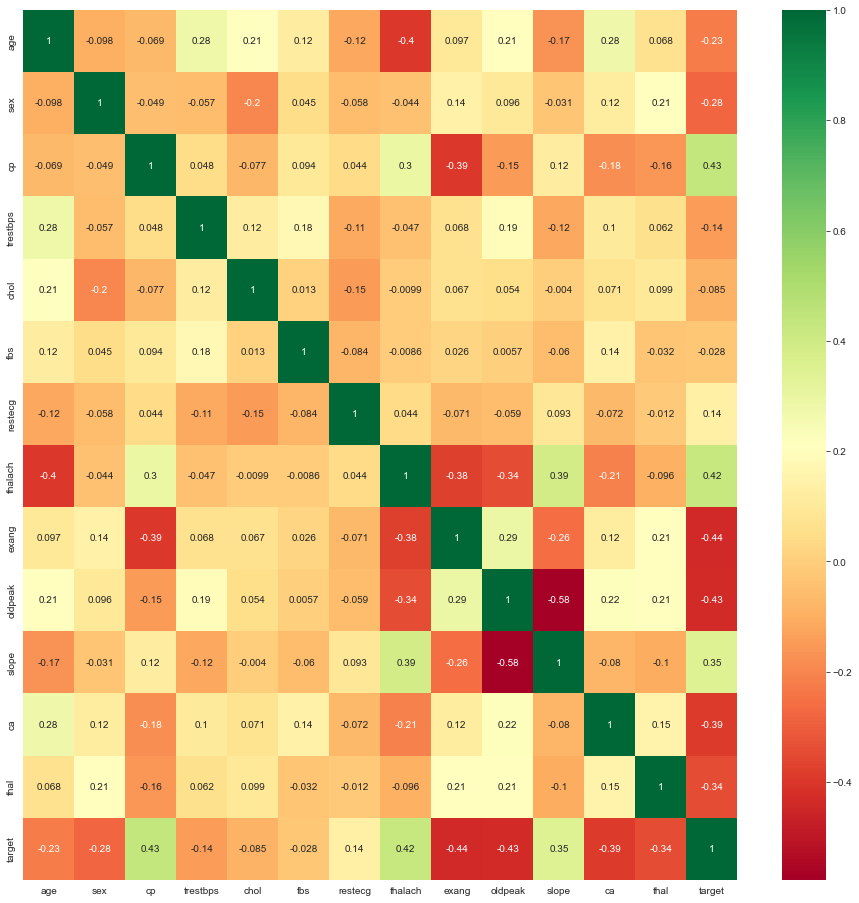

In [11]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

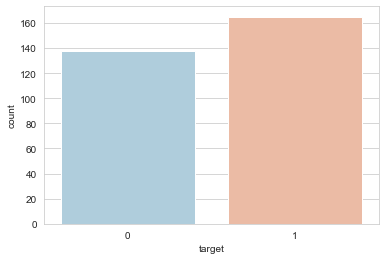

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.show()

## Data Processing

After exploring the data set, It was observed that some categorical variables needs to be converted into dummy variables and scale all the values before training the Machine Learning models.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex', 'cp','fbs','restecg', 'exang', 'slope','ca', 'thal']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


## Modeling

In [16]:
y = df['target']
X = df.drop(['target'], axis = 1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

1. KNN Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

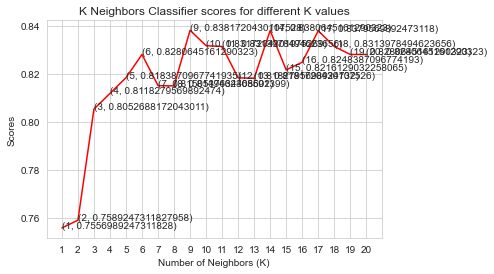

In [23]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors = 9)
knn_classifier.fit(X_train, y_train)
knn_score=cross_val_score(knn_classifier,X,y,cv=10)
knn_score.mean()

0.8381720430107528

In [29]:
from sklearn.metrics import classification_report
knn_classifier_pred = knn_classifier.predict(X_test) 
print(classification_report(knn_classifier_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.86      0.86      0.86        58

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



2. Desicion Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
from sklearn.metrics import classification_report
dtc_pred = dtc_model.predict(X_test) 
print(classification_report(dtc_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        51
           1       0.71      0.84      0.77        49

    accuracy                           0.75       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.76      0.75      0.75       100



3. Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
from sklearn.metrics import classification_report
rfc_pred = rfc_model.predict(X_test) 
print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        45
           1       0.79      0.84      0.81        55

    accuracy                           0.79       100
   macro avg       0.79      0.78      0.79       100
weighted avg       0.79      0.79      0.79       100



2. Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report
rfc_pred = rfc_model.predict(X_test) 
print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        45
           1       0.79      0.84      0.81        55

    accuracy                           0.79       100
   macro avg       0.79      0.78      0.79       100
weighted avg       0.79      0.79      0.79       100



4. Xgboost Model

In [40]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

[13:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
from sklearn.metrics import classification_report
xgb_pred = xgb_model.predict(X_test) 
print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        44
           1       0.83      0.86      0.84        56

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.82      0.82      0.82       100



5. Bagging Model

In [43]:
from sklearn.ensemble import BaggingClassifier
base_methods=[dtc_model, knn_classifier, rfc_model, xgb_model]
for bm  in base_methods:
    print("Method: ", bm)
    bag_model=BaggingClassifier(base_estimator=bm, n_estimators=100, bootstrap=True)
    bag_model=bag_model.fit(X_train,y_train)
    y_test_pred=bag_model.predict(X_test)
    print(bag_model.score(X_test, y_test))
    print(classification_report(y_test, y_test_pred))

Method:  DecisionTreeClassifier()
0.84
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.88      0.84      0.86        58

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

Method:  KNeighborsClassifier(n_neighbors=9)
0.85
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.86      0.88      0.87        58

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.85      0.85      0.85       100

Method:  RandomForestClassifier()
0.83
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        42
           1       0.85      0.86      0.85        58

    accuracy                           0.83       100


## Deployment

In [47]:
import pickle
# from sklearn.externals import joblib
import joblib

models = [dtc_model, knn_classifier, rfc_model]
for model in models:
    joblib.dump(model, f'{model}.pkl')